### In this notebook we will perform EDA on the house pricing dataset
***

In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import pickle

# from keras.models import Sequential
# from keras.layers import Dense
# from keras.optimizers import Adam
# from keras.models import load_model

In [4]:
housing_df = pd.read_csv('../input/kc_house_data.csv', delimiter=',',
                        encoding='UTF-8')

In [5]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
housing_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
# checking if any missing data
housing_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
housing_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


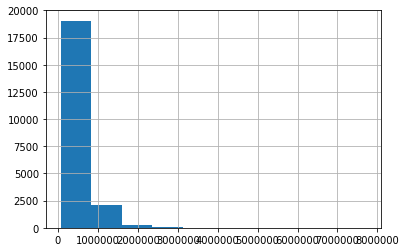

In [9]:
# for continuous labels doing a distribution plot
housing_df['price'].hist()

/home/deb/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


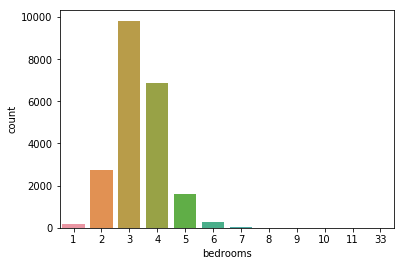

In [10]:
# for categorical variables using a countplot
sns.countplot(housing_df['bedrooms']);

In [11]:
# another way of doing EDA is to see the correlation between the features and target variable
housing_df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

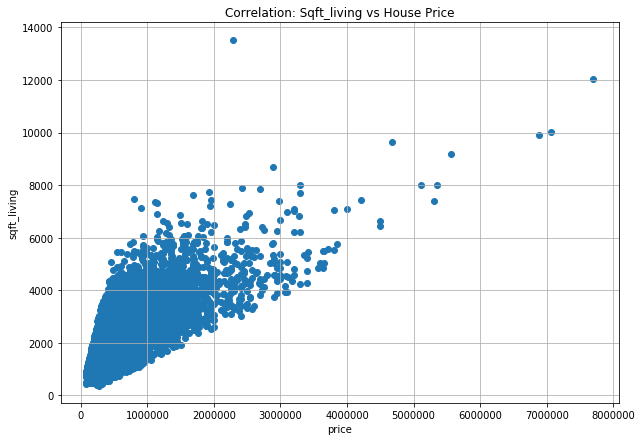

In [12]:
# we see that sqft_living has a high corr with price, lets do a scatter plot to see what's up
plt.figure(figsize=(10,7))
plt.title('Correlation: Sqft_living vs House Price')
plt.grid()
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.scatter(x='price', y='sqft_living', data=housing_df)
plt.savefig('../plots/Correlation_Sqft_living_vs_House_Price.png')

/home/deb/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


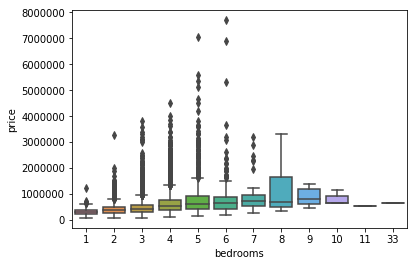

In [13]:
sns_boxplot_bedrooms_price = sns.boxplot(x='bedrooms', y='price', data=housing_df)
sns_boxplot_bedrooms_price.figure.savefig('../plots/box_plot_bedrooms_price.png')

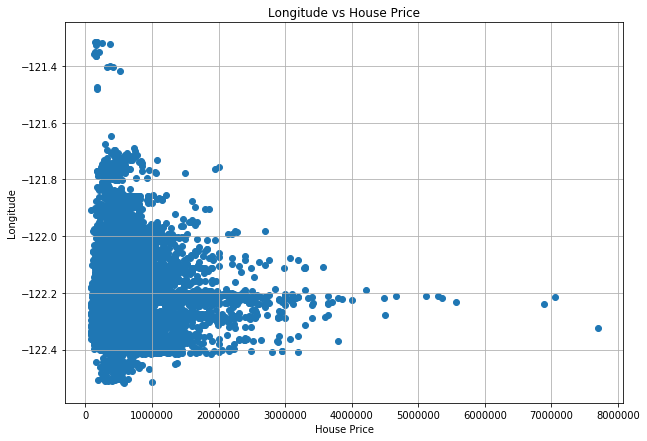

In [14]:
plt.figure(figsize=(10,7))
plt.title('Longitude vs House Price')
plt.grid()
plt.xlabel('House Price')
plt.ylabel('Longitude')
plt.scatter(x='price',y='long', data=housing_df)
plt.savefig('../plots/house_price_vs_longitude.png')

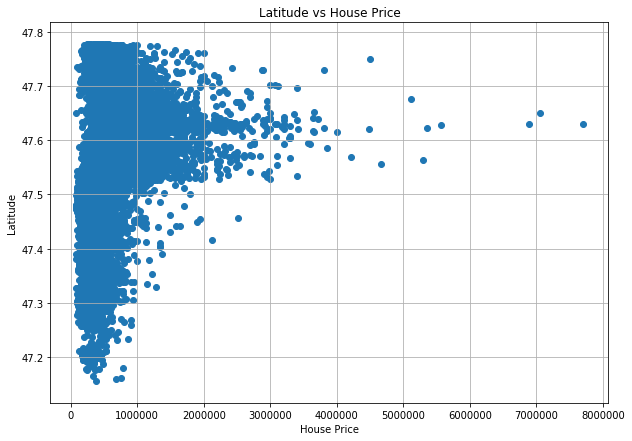

In [15]:
plt.figure(figsize=(10,7))
plt.title('Latitude vs House Price')
plt.grid()
plt.xlabel('House Price')
plt.ylabel('Latitude')
plt.scatter(x='price',y='lat', data=housing_df)
plt.savefig('../plots/house_price_vs_latitude.png')

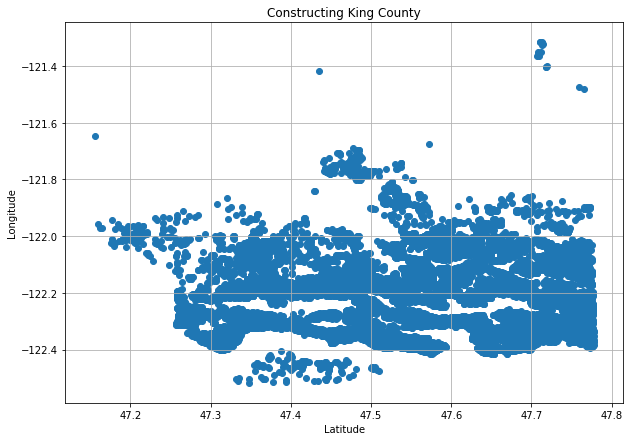

In [16]:
plt.figure(figsize=(10,7))
plt.title('Constructing King County')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.scatter(x='lat',y='long', data=housing_df)
plt.savefig('../plots/Lat_long_king_county.png')

In [17]:
# exploring the date features
housing_df['date'].head()
# we can use this column to extract month and year,
# as that might have an impact on the price of the house
# then i can extract month and year from the date. Day might be too specific

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

In [18]:
# drop zip code column: requires domain expertise
# lets look at year_renovated
housing_df['yr_renovated'].value_counts()

# looks like more recent houses have been renovated, so higher the number, the better
# we can keep this column as it is

0       20683
2014       91
2013       37
2003       36
2000       35
2007       35
2005       35
2004       26
1990       25
2006       24
2009       22
1989       22
2002       22
1991       20
2001       19
1998       19
1994       19
1993       19
1987       18
1983       18
1984       18
2010       18
2008       18
1986       17
1985       17
1999       17
1992       17
2015       16
1995       16
1996       15
        ...  
1975        6
1978        6
1981        5
1964        5
1965        5
1958        5
1973        5
1969        4
1972        4
1960        4
1963        4
1956        3
1945        3
1974        3
1953        3
1955        3
1976        3
1957        3
1962        2
1950        2
1967        2
1946        2
1971        2
1940        2
1954        1
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [19]:
# here we will split our dataset into raw train and test
# shuffling the dataset
housing_df = housing_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [20]:
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,6303401050,2/20/2015,132500.0,3,0.75,850,8573,1.0,0,0,...,6,600,250,1945,0,98146,47.5030,-122.356,850,8382
1,1995200200,10/8/2014,415000.0,3,1.00,1510,6083,1.0,0,0,...,6,860,650,1940,0,98115,47.6966,-122.324,1510,5712
2,1423089118,3/25/2015,494000.0,4,2.25,1790,42000,1.0,0,0,...,7,1170,620,1983,0,98045,47.4819,-121.744,2060,50094
3,9349900110,2/17/2015,355000.0,2,1.50,1140,2500,1.0,0,1,...,7,630,510,1988,0,98106,47.5707,-122.359,1500,5000
4,455000395,5/23/2014,606000.0,3,1.00,1500,3920,1.0,0,0,...,7,1000,500,1947,0,98107,47.6718,-122.359,1640,4017


In [21]:
raw_train_df = housing_df[:int(0.7*housing_df.shape[0])]

In [9]:
int(0.7*housing_df.shape[0])

15117

In [10]:
raw_train_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15112,6329000705,4/2/2015,545000.0,2,1.50,2340,13380,1.0,0,0,...,7,1280,1060,1954,0,98146,47.5017,-122.377,1490,8100
15113,3876313120,5/1/2015,505000.0,3,1.75,1800,7210,1.0,0,0,...,7,1370,430,1976,0,98072,47.7346,-122.170,1820,8100
15114,1685200020,8/27/2014,203000.0,3,1.75,1490,8000,1.0,0,0,...,7,1200,290,1978,0,98092,47.3187,-122.180,1540,8000
15115,217500015,2/24/2015,394999.0,3,1.50,1730,7800,1.0,0,0,...,7,1330,400,1958,0,98133,47.7365,-122.337,1780,8309
15116,9346700320,3/23/2015,722500.0,4,2.50,2460,9296,2.0,0,0,...,9,2460,0,1978,0,98007,47.6125,-122.152,2730,9900


In [11]:
# doing a 70-30 train-test split
raw_test_df = housing_df[int(0.7*housing_df.shape[0]):]

In [12]:
with open('../input/raw_train_set.pickle', 'wb') as pickle_handle:
    pickle.dump(raw_train_df, pickle_handle)

In [13]:
with open('../input/raw_test_set.pickle', 'wb') as pickle_handle:
    pickle.dump(raw_test_df, pickle_handle)

#### Features to engineer
1. date
2. minmax scale the rest

#### Features to drop:
1. id
2. zipcode
3. date- after extracting month and year



In [17]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,kfold
0,6303401050,2/20/2015,132500.0,3,0.75,850,8573,1.0,0,0,...,600,250,1945,0,98146,47.5030,-122.356,850,8382,1
1,1995200200,10/8/2014,415000.0,3,1.00,1510,6083,1.0,0,0,...,860,650,1940,0,98115,47.6966,-122.324,1510,5712,3
2,1423089118,3/25/2015,494000.0,4,2.25,1790,42000,1.0,0,0,...,1170,620,1983,0,98045,47.4819,-121.744,2060,50094,2
3,9349900110,2/17/2015,355000.0,2,1.50,1140,2500,1.0,0,1,...,630,510,1988,0,98106,47.5707,-122.359,1500,5000,0
4,455000395,5/23/2014,606000.0,3,1.00,1500,3920,1.0,0,0,...,1000,500,1947,0,98107,47.6718,-122.359,1640,4017,3
